# AutoCorrelation

This notebook examines auto-correlation measures applied to simulated neural time series.

TODO: check osc colors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.aperiodic import compute_autocorr
from neurodsp.sim import sim_powerlaw, sim_combined, sim_synaptic_current

In [1]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims
from apm.methods import autocorr, autocorr_decay_time, compute_decay_time
from apm.methods.settings import AC_PARAMS, AC_PARAMS_DECAY, DECAY_LEVEL
from apm.plts import plot_lines, plot_colorbar
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.plts.utils import truncate_colormap
from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Custom settings for autocorrelation - downsample frequencies and powers
FREQS2 = np.arange(5, 40, 10)
POWERS2 = np.arange(0, 2.5, 0.5)

In [5]:
# Check auto-correlation parameters
print(AC_PARAMS)
print(AC_PARAMS_DECAY)
print(DECAY_LEVEL)

{'max_lag': 250, 'lag_step': 1}
{'max_lag': 1500, 'lag_step': 2}
0.5


In [6]:
# Combine all parameters needed for computing decay rate
DECAY_PARAMS = {}
DECAY_PARAMS.update(AC_PARAMS_DECAY)
DECAY_PARAMS.update({'fs' : FS, 'level' : DECAY_LEVEL})
DECAY_PARAMS

{'max_lag': 1500, 'lag_step': 2, 'fs': 1000, 'level': 0.5}

In [7]:
# Set the colormap for the plots
cmap_name = 'BuGn_r'
cmap_range = (0., 0.75)

# Get the requested colormap & range
cmap = truncate_colormap(plt.get_cmap(cmap_name), *cmap_range)

# Set up the colors for plotting
exp_colors = cmap(np.linspace(0., 1.0, len(EXPS)))
freq_colors = cmap(np.linspace(0., 1.0, len(FREQS2)))
power_colors = cmap(np.linspace(0., 1.0, len(POWERS2)))

In [8]:
# Plot settings
PLT_KWARGS = {
    'xlabel' : 'Time (s)',
    'ylabel' : 'Autocorrelation',
}

In [9]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '13_autocorr'

## Calculating AutoCorrelation on Example Signals

### Powerlaw Signals

In [10]:
# Calculate autocorrelation
times, sig_ap_acs = compute_autocorr(SIG_AP, **AC_PARAMS)

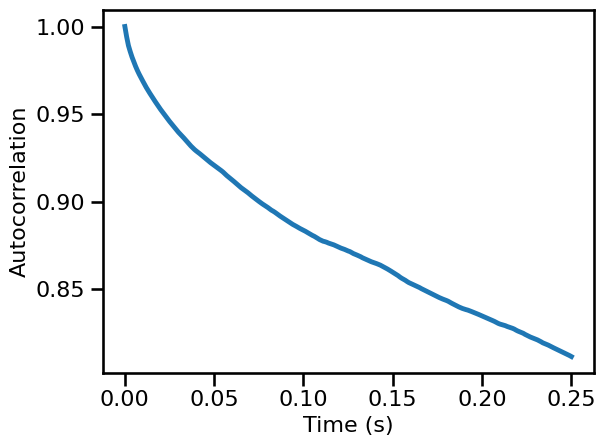

In [11]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_ap_acs, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_ap' + EXT, file_path=FIGPATH)

In [12]:
# Check decay rate time
autocorr_decay_time(SIG_AP, FS, DECAY_LEVEL, **AC_PARAMS_DECAY)

1.398

### Oscillatory Signal

In [13]:
# Calculate autocorrelation
times, sig_osc_acs = compute_autocorr(SIG_OSC, **AC_PARAMS)

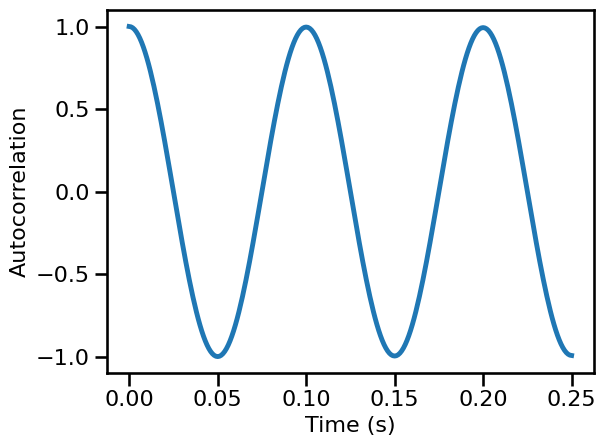

In [14]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_osc_acs, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_osc' + EXT, file_path=FIGPATH)

In [15]:
# Check decay rate time
autocorr_decay_time(SIG_OSC, FS, DECAY_LEVEL, **AC_PARAMS_DECAY)

0.018

### Combined Signal

In [16]:
# Calculate autocorrelation
times, sig_comb_acs = compute_autocorr(SIG_COMB, **AC_PARAMS)

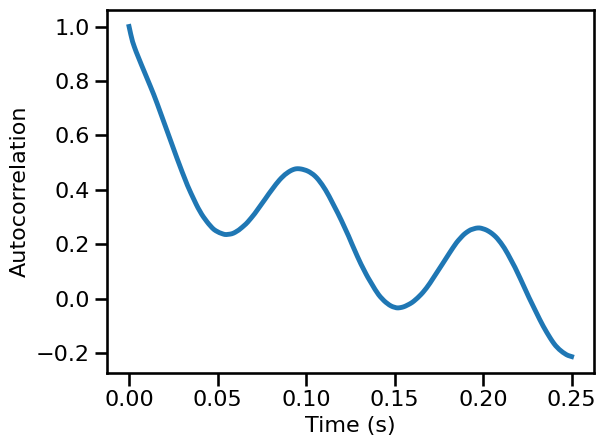

In [17]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_comb_acs, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_comb' + EXT, file_path=FIGPATH)

In [18]:
# Check decay rate time
autocorr_decay_time(SIG_COMB, FS, DECAY_LEVEL, **AC_PARAMS_DECAY)

0.028

### Powerlaw Signals with a Knee

In [19]:
# Calculate autocorrelation
times, sig_kn_acs = compute_autocorr(SIG_KN, **AC_PARAMS)

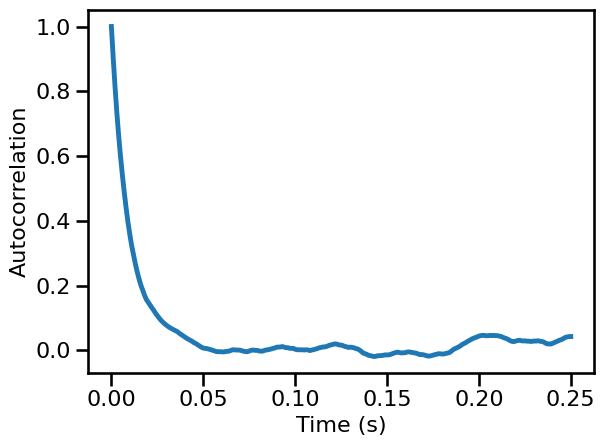

In [20]:
# Plot the autocorrelation across time delays
plot_lines(times / FS, sig_kn_acs, **PLT_KWARGS,
           save_fig=SAVE_FIG, file_name='ac_knee' + EXT, file_path=FIGPATH)

In [21]:
# Check decay rate time
autocorr_decay_time(SIG_KN, FS, DECAY_LEVEL, **AC_PARAMS_DECAY)

0.008

## AutoCorrelation Simulations: Aperiodic Variations

### Powerlaw Signals

In [22]:
# Run a set of simulations, calculating autocorrelation across exponents
acs_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, autocorr, AC_PARAMS,
                   'update_exp', EXPS, N_SIMS)
acs_exp = np.array(acs_exp)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anacond

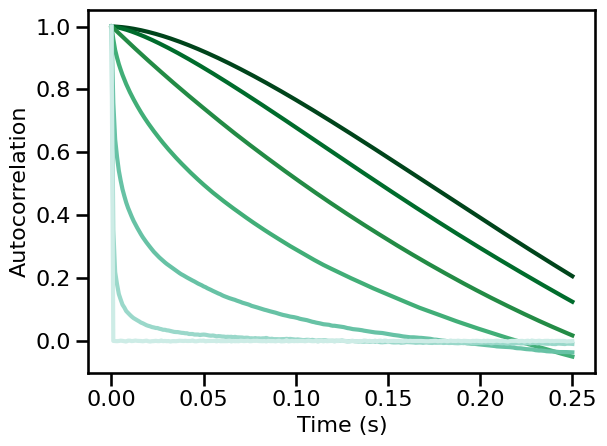

In [23]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_exp, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='acs_exp' + EXT, file_path=FIGPATH)

In [24]:
# Run a set of simulations, calculating autocorrelation across exponents
decay_exp, decay_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, autocorr_decay_time, DECAY_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

### Combined Signals

In [25]:
# Run a set of simulations, calculating autocorrelation across exponents, with an oscillation
acs_comb = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS,
                    'update_comb_exp', EXPS, N_SIMS)
acs_comb = np.array(acs_comb)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anacond

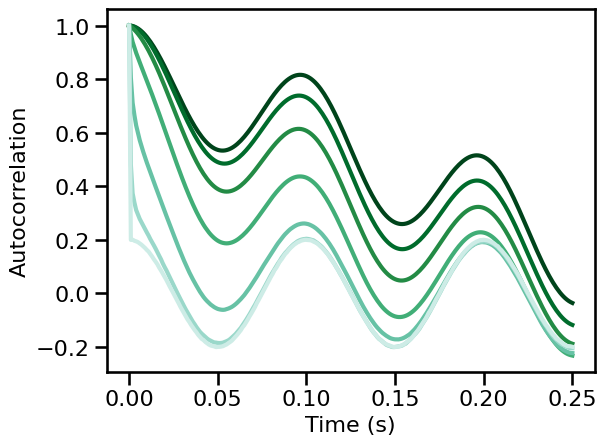

In [26]:
# Plot autocorrelation across exponent values
for ac, color in zip(acs_comb, exp_colors):
    plot_lines(times / FS, ac, color=color, lw=3)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='acs_comb' + EXT, file_path=FIGPATH)

In [27]:
# Run a set of simulations, calculating autocorrelation across exponents
decay_comb, decay_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, DECAY_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


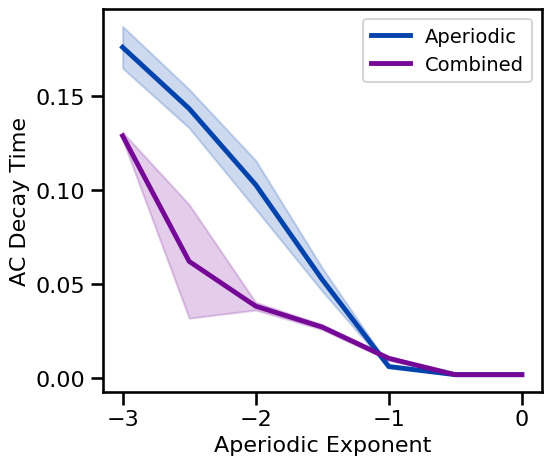

In [28]:
# Plot AC decay rate estimates across aperiodic variations
plot_ap_sims(decay_exp, decay_exp_var, decay_comb, decay_comb_var,
             'AC Decay Time', save_fig=SAVE_FIG, file_name='ac_decay_ap' + EXT, file_path=FIGPATH)

## AutoCorrelation Simulations: Periodic Variations

### Oscillation Frequency

In [29]:
# Run a set of simulations, calculating autocorrelations across oscillation frequency
acs_freq = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS,
                    'update_freq', FREQS2, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


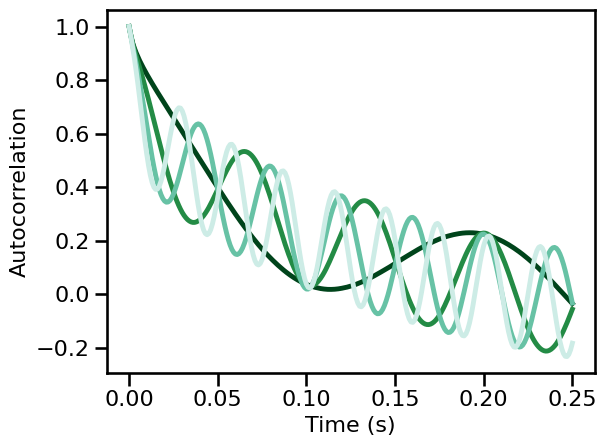

In [30]:
# Plot autocorrelation across oscillation frequency
for ac, color in zip(acs_freq, freq_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='acs_osc_freq' + EXT, file_path=FIGPATH)

In [31]:
# Run a set of simulations, calculating autocorrelation across oscillation frequency
decay_freq, decay_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, DECAY_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

### Oscillation Power

In [32]:
# Run a set of simulations, calculating autocorrelations across oscillation power
acs_pow = run_sims(sim_combined, SIM_PARAMS_COMB, autocorr, AC_PARAMS,
                   'update_pow', POWERS2, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


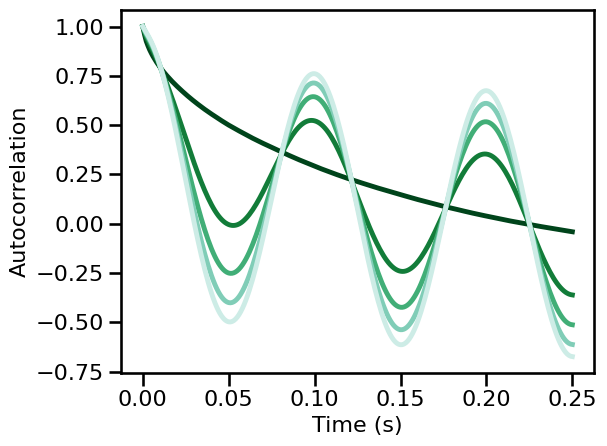

In [33]:
# Plot autocorrelation across oscillation power
for ac, color in zip(acs_pow, power_colors):
    plot_lines(times / FS, ac, color=color)
plot_lines(**PLT_KWARGS, save_fig=SAVE_FIG, file_name='acs_osc_pow' + EXT, file_path=FIGPATH)

In [34]:
# Run a set of simulations, calculating autocorrelation across oscillation power
decay_pow, decay_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, autocorr_decay_time, DECAY_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


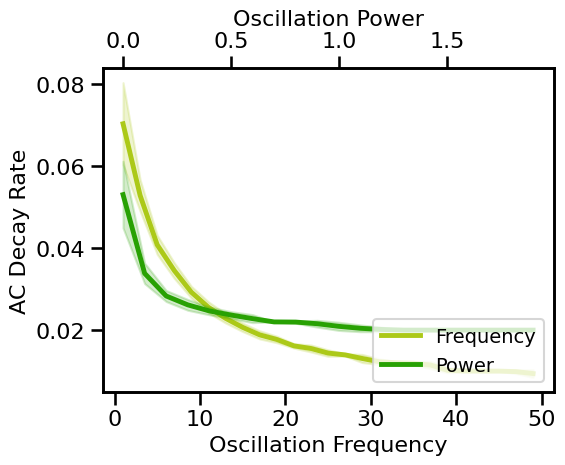

In [35]:
# Plot AC decay rate estimates across periodic variations
plot_pe_sims(decay_freq, decay_freq_var, decay_pow, decay_pow_var,
             'AC Decay Rate', save_fig=SAVE_FIG, file_name='ac_decay_pe' + EXT, file_path=FIGPATH)

### Create colorbars for the plots

In [36]:
# Make colorbars for the plots
plot_colorbar(cmap, min(EXPS), max(EXPS), 'exponent', close=True,
              save_fig=SAVE_FIG, file_name='acs_exp_cbar' + EXT, file_path=FIGPATH)

# Make colorbars for the plots
plot_colorbar(cmap, min(FREQS), max(FREQS), 'frequency', close=True,
              save_fig=SAVE_FIG, file_name='acs_freq_cbar' + EXT, file_path=FIGPATH)

# Make colorbars for the plots
plot_colorbar(cmap, min(POWERS), max(POWERS), 'power', close=True,
              save_fig=SAVE_FIG, file_name='acs_pow_cbar' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Autocorrelation:
- The autocorrelation of 1/f signals decreases across increasing time lags
    - The quickness of this decay relates to the 1/f exponent
- The autocorrelation of periodic signals is itself rhythmic
    - The frequency and scale of the autocorrelation relates to oscillatory frequency and power respectively
- The autocorrelation of combined signals exhibits with decreasing + rhythmic properties of each component